In [1]:
from datetime import datetime, timedelta, time
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from plotly.offline import init_notebook_mode
from sklearn.preprocessing import MinMaxScaler
from sqlalchemy import create_engine
import json
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as go
import re
import requests
init_notebook_mode(connected=True)

## Twitter data

In [2]:
# load csv data 
df = pd.read_csv('tweets1.csv')
 
df.head()

,screenName,created,url,text,replyCount,retweetCount,favoriteCount
0,Derek Brockway - weatherman,2018-03-09,/DerekTheWeather/status/972244216075161600,The Madden Julian Oscillation MJO is now in ph...,29.0,73,104
1,Dave Andrews,2018-03-09,/iPterodroma/status/972187729978150912,My best images the Norfolk Snowy Owl at Scolt ...,9.0,47,262
2,YorkshireShepherdess,2018-03-09,/AmandaOwen8/status/972187140728684544,The snow has receded enough to let us try and ...,3.0,48,573
3,Essex Police FSU,2018-03-09,/EssexPoliceFSU/status/972076936183853056,SFO's from the FSU have to complete annual mar...,5.0,21,124
4,Peter Lord,2018-03-09,/PeteLordAardman/status/972040945700139008,Hiking Norway-style with @AmazingMorph. Don't...,3.0,8,102


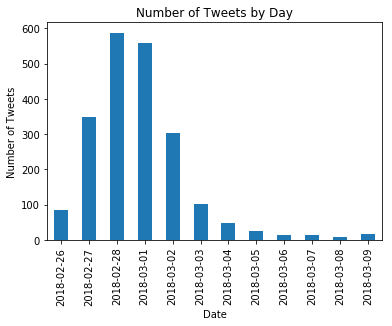

In [3]:
# plot numbers of tweets by day
df.groupby('created').size().plot(kind = 'bar')

# define the title and the labels
plt.title('Number of Tweets by Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

In [4]:
df.groupby('created').size()

created
2018-02-26     85
2018-02-27    348
2018-02-28    587
2018-03-01    557
2018-03-02    302
2018-03-03    101
2018-03-04     49
2018-03-05     26
2018-03-06     14
2018-03-07     14
2018-03-08      7
2018-03-09     17
dtype: int64

In [5]:
#tweets interactive plot
plotly.offline.iplot({
"data": [{
    "x": df.groupby('created').size().index,
    "y": df.groupby('created').size()
}],
"layout": {
    "title": "#BeastFromTheEast Tweets"
}
})

In [28]:
#tweets interactive plot export
plotly.offline.plot(
    {
        "data": [{
            "x": df.groupby('created').size().index,
            "y": df.groupby('created').size()
        }],
        "layout": {
            "title": "#BeastFromTheEast Tweets"
        }
    },
    filename="tweets.html"
)

'file://C:\\Users\\43607\\Downloads\\Untitled Folder 2\\tweets.html'

## Google Trends of Motorways

In [6]:
pytrends = pd.read_csv('pytrends_100.csv', index_col = 'Datetime')
pytrends.index = pd.to_datetime(pytrends.index, format = '%d/%m/%Y %H:%M')

In [7]:
pytrends_10 = pytrends.loc[:, ['M1', 'M3', 'M4', 'M5', 'M6', 'M6(T)', 'M8', 'M25', 'M40', 'M42', 'M62', 'M80']]

In [8]:
#trends interactive plot
plotly.offline.iplot({
"data": [{
    "x": pytrends_10.index,
    "y": pytrends_10[col],
    'name': col
}  for col in pytrends_10.columns],
"layout": {
    "title": "Google trends of Motorways in UK"
}
})

In [9]:
#trends interactive plot export
plotly.offline.plot(
    {
        "data": [{
            "x": pytrends_10.index,
            "y": pytrends_10[col],
            'name': col
        }  for col in pytrends_10.columns],
        "layout": {
            "title": "Google trends of Motorways in UK"
        }
    },
    filename="trends_byMotorway.html"
)

'file://C:\\Users\\43607\\Downloads\\Untitled Folder 2\\trends_byMotorway.html'

In [10]:
trends_regions = pytrends.loc[:,['M25', 'M4', 'M5', 'M3', 'M6', 'M62', 'M80']]
trends_regions = trends_regions.rename(columns={'M25': 'London(M25)', 'M4': 'Bristol(M4)', 'M5': 'Exeter(M5)', 
                                                'M3': 'Southampton(M3)', 'M6': 'Birmingham(M6)', 'M62': 'Manchester(M62)',
                                                'M80': 'Glasgow(M80)'})
trends_regions.head()

,London(M25),Bristol(M4),Exeter(M5),Southampton(M3),Birmingham(M6),Manchester(M62),Glasgow(M80)
Datetime,,,,,,,
2018-02-26 00:00:00,2,0.8,1.6,0,7.200000,1,0.0
2018-02-26 01:00:00,0,0.0,0.0,0,0.000000,0,0.0
2018-02-26 02:00:00,0,0.0,2.0,0,42.000000,2,0.0
2018-02-26 03:00:00,0,0.0,2.0,0,32.666667,0,0.0
2018-02-26 04:00:00,0,0.0,0.0,0,51.333333,2,0.0


In [11]:
#interactive plot export function
def plotGraph(data, title, fileString):
    
    # trace of London
    trace1 = go.Scatter(
        x = data.index,
        y = data.iloc[:,0],
        mode = 'lines',
        name = data.columns[0],    
    )
    # trace of Manchester
    trace2 = go.Scatter(
        x = data.index,
        y = data.iloc[:,5],
        mode = 'lines',
        name = data.columns[5],    
    )
    # trace of Glasgow
    trace3 = go.Scatter(
        x = data.index,
        y = data.iloc[:,6],
        mode = 'lines',
        name = data.columns[6],    
    )
    # trace of Bristol
    trace4 = go.Scatter(
        x = data.index,
        y = data.iloc[:,1],
        mode = 'lines',
        name = data.columns[1],
        visible ='legendonly'
    )
    # trace of Exeter
    trace5 = go.Scatter(
        x = data.index,
        y = data.iloc[:,2],
        mode = 'lines',
        name = data.columns[2],
        visible ='legendonly'
    )
    # trace of Southampton
    trace6 = go.Scatter(
        x = data.index,
        y = data.iloc[:,3],
        mode = 'lines',
        name = data.columns[3],
        visible ='legendonly'
    )
    # trace of Birmingham
    trace7 = go.Scatter(
        x = data.index,
        y = data.iloc[:,4],
        mode = 'lines',
        name = data.columns[4],
        visible ='legendonly'
    )

    plotly.offline.plot(
        {
            "data": [trace1, trace2, trace3, trace4, trace5, trace6, trace7],
            "layout": {
                "title": title
            }
        },
        filename = fileString
    )

In [12]:
#trends by city interactive plot export
plotGraph(trends_regions, "Google trends of Motorways by City", "trends_byCity.html")  

## Weather plot

In [13]:
weather = pd.read_csv('city_data.csv')

In [14]:
weather.head()

,Unnamed: 0,timestamp,London_AT,London_SD,London_VZ,London_WS,Bristol_AT,Bristol_SD,Bristol_VZ,Bristol_WS,...,Cardif_VZ,Cardif_WS,Edinborough_AT,Edinborough_SD,Edinborough_VZ,Edinborough_WS,Glasgow_AT,Glasgow_SD,Glasgow_VZ,Glasgow_WS
0,1,26/02/2018 00:00,0.97500,0,2250.0,8.000000,-2.3500,0.0,2250.0,10.333333,...,1000.0,13.0,-0.433333,0.0,1650.0,3.500,-0.8000,0.0,1900.0,7.500
1,2,26/02/2018 00:15,1.08125,0,2312.5,8.333333,-2.3875,0.0,2187.5,10.333333,...,1000.0,14.0,-0.350000,0.0,1700.0,3.125,-0.8625,0.0,1912.5,7.625
2,3,26/02/2018 00:30,1.18750,0,2375.0,8.666667,-2.4250,0.0,2125.0,10.333333,...,1000.0,15.0,-0.266667,0.0,1750.0,2.750,-0.9250,0.0,1925.0,7.750
3,4,26/02/2018 00:45,1.29375,0,2437.5,9.000000,-2.4625,0.0,2062.5,10.333333,...,1000.0,16.0,-0.183333,0.0,1800.0,2.375,-0.9875,0.0,1937.5,7.875
4,5,26/02/2018 01:00,1.40000,0,2500.0,9.333333,-2.5000,0.0,2000.0,10.333333,...,1000.0,17.0,-0.100000,0.0,1850.0,2.000,-1.0500,0.0,1950.0,8.000


### temperature

In [15]:
temp = weather.loc[:,['timestamp', 'London_AT', 'Bristol_AT', 'Exeter_AT', 'Southampton_AT', 'Birmingham_AT', 
                     'Manchester_AT', 'Glasgow_AT']]


In [16]:
temp.head()

,timestamp,London_AT,Bristol_AT,Exeter_AT,Southampton_AT,Birmingham_AT,Manchester_AT,Glasgow_AT
0,26/02/2018 00:00,0.97500,-2.3500,-0.8500,-0.55000,-2.200,-1.133333,-0.8000
1,26/02/2018 00:15,1.08125,-2.3875,-0.9625,-0.53125,-2.325,-1.225000,-0.8625
2,26/02/2018 00:30,1.18750,-2.4250,-1.0750,-0.51250,-2.450,-1.316667,-0.9250
3,26/02/2018 00:45,1.29375,-2.4625,-1.1875,-0.49375,-2.575,-1.408333,-0.9875
4,26/02/2018 01:00,1.40000,-2.5000,-1.3000,-0.47500,-2.700,-1.500000,-1.0500


In [17]:
temp['timestamp'] = pd.to_datetime(temp['timestamp'], format = '%d/%m/%Y %H:%M')

In [18]:
temp = temp.groupby([temp['timestamp'].dt.floor('H')]).agg(['mean'])

In [19]:
temp.columns = temp.columns.droplevel(1)
temp.rename(columns=lambda x: x[:-3], inplace=True)
temp.head()

,London,Bristol,Exeter,Southampton,Birmingham,Manchester,Glasgow
timestamp,,,,,,,
2018-02-26 00:00:00,1.134375,-2.40625,-1.01875,-0.521875,-2.387500,-1.270833,-0.89375
2018-02-26 01:00:00,1.381250,-2.74375,-1.50625,-0.503125,-2.850000,-1.300000,-1.55625
2018-02-26 02:00:00,1.237500,-3.15000,-1.85000,-0.353125,-2.912500,-0.791667,-2.36250
2018-02-26 03:00:00,0.918750,-3.28125,-1.94375,0.031250,-2.362500,-0.450000,-2.46875
2018-02-26 04:00:00,0.615625,-3.36875,-2.19375,0.106250,-1.704167,-0.229167,-2.84375


In [21]:
#temperature interactive plot
plotly.offline.iplot({
"data": [{
    "x": temp.index,
    "y": temp[col],
    'name': col,
}  for col in temp.columns],
"layout": {
    "title": "Temperature Change in UK Cities"
}
})

In [35]:
#temp interactive plot export
plotGraph(temp, "Temperature Change in UK Cities (°C)", "weather_temperature.html")  

### snow

In [22]:
weather_snow = pd.read_csv('city_data_50km.csv')
weather_snow = weather_snow.iloc[0:768,:]

In [23]:
snow = weather_snow.loc[:,['timestamp', 'London_SD', 'Bristol_SD', 'Exeter_SD', 'Southampton_SD', 'Birmingham_SD', 
                     'Manchester_SD', 'Glasgow_SD']]

In [24]:
snow['timestamp'] = pd.to_datetime(snow['timestamp'])

In [25]:
snow.fillna(0, inplace=True)

In [26]:
snow = snow.groupby([snow['timestamp'].dt.floor('H')]).agg(['mean'])
snow.columns = snow.columns.droplevel(1)
snow.rename(columns=lambda x: x[:-3], inplace=True)

In [27]:
snow.head()

,London,Bristol,Exeter,Southampton,Birmingham,Manchester,Glasgow
timestamp,,,,,,,
2018-02-26 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-26 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-26 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-26 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-26 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#snow interactive plot export
plotGraph(snow, "Snow Depth Change in UK Cities (cm)", "weather_snow.html") 

### Visibility

In [28]:
weather_vis = pd.read_csv('city_data_50km.csv')

In [29]:
vis = weather_vis.loc[:,['timestamp', 'London_VZ', 'Bristol_VZ', 'Exeter_VZ', 'Southampton_VZ', 'Birmingham_VZ',
                     'Manchester_VZ', 'Glasgow_VZ']]
vis['timestamp'] = pd.to_datetime(vis['timestamp'])
vis = vis.groupby([vis['timestamp'].dt.floor('H')]).agg(['mean'])
vis.columns = vis.columns.droplevel(1)
vis.rename(columns=lambda x: x[:-3], inplace=True)

In [30]:
vis.head()

,London,Bristol,Exeter,Southampton,Birmingham,Manchester,Glasgow
timestamp,,,,,,,
2018-02-26 00:00:00,2958.333333,2156.25,3246.875,3314.583333,3916.666667,3340.625,2442.5
2018-02-26 01:00:00,3067.708333,2000.00,3056.250,3243.750000,3927.083333,2803.125,2625.0
2018-02-26 02:00:00,3156.250000,2000.00,2818.750,3372.916667,3175.000000,2359.375,2775.0
2018-02-26 03:00:00,3218.750000,2000.00,2418.750,3397.916667,3171.875000,2365.625,2930.0
2018-02-26 04:00:00,3677.083333,2000.00,2268.750,3283.333333,3515.625000,2246.875,2980.0


In [45]:
#visibility interactive plot export
plotGraph(vis, "Visibility Change in UK Cities (m)", "weather_visibility.html") 

### Wind speed

In [31]:
wind = weather.loc[:,['timestamp', 'London_WS', 'Bristol_WS', 'Exeter_WS', 'Southampton_WS', 'Birmingham_WS', 
                     'Manchester_WS', 'Glasgow_WS']]

In [32]:
wind['timestamp'] = pd.to_datetime(wind['timestamp'], format = '%d/%m/%Y %H:%M')
wind = wind.groupby([wind['timestamp'].dt.floor('H')]).agg(['mean'])

In [33]:
wind.columns = wind.columns.droplevel(1)
wind.rename(columns=lambda x: x[:-3], inplace=True)
wind.head()

,London,Bristol,Exeter,Southampton,Birmingham,Manchester,Glasgow
timestamp,,,,,,,
2018-02-26 00:00:00,8.500000,10.333333,6.0625,7.208333,4.6250,3.250000,7.6875
2018-02-26 01:00:00,9.333333,10.583333,5.6875,6.500000,3.8125,1.875000,7.0625
2018-02-26 02:00:00,9.958333,10.375000,4.6250,6.166667,3.8750,2.166667,5.8750
2018-02-26 03:00:00,10.875000,9.208333,6.3125,8.125000,4.8750,2.875000,5.0000
2018-02-26 04:00:00,10.041667,9.500000,6.3750,10.000000,5.3125,3.541667,2.6875


In [52]:
#wind speed  interactive plot export
plotGraph(wind, "Wind Speed Change in UK Cities (knot)", "weather_windSpeed.html") 

### footfall

In [37]:
foot = pd.read_csv('city_foot_data.csv')
foot['timestamp'] = pd.to_datetime(foot['timestamp'], format = '%d/%m/%Y %H:%M')
foot = foot.groupby([foot['timestamp'].dt.floor('H')]).agg(['mean'])
foot.columns = foot.columns.droplevel(1)
foot.rename(columns=lambda x: x[:-9], inplace=True)

In [38]:
foot = foot.drop(['Durham', 'Leicester', 'Cardiff', 'Edinburgh'], axis = 1)

In [39]:
foot.head()

,London,Bristol,Exeter,Southampton,Birmingham,Manchester,Glasgow
timestamp,,,,,,,
2018-02-26 00:00:00,0.986400,0.848050,0.992703,0.990237,0.993542,0.943987,0.989536
2018-02-26 01:00:00,0.948336,0.819612,0.973339,0.964056,0.976448,0.879866,0.961309
2018-02-26 02:00:00,0.909090,0.791223,0.954619,0.936405,0.959219,0.812930,0.932628
2018-02-26 03:00:00,0.869058,0.762929,0.935704,0.908247,0.942000,0.744897,0.903913
2018-02-26 04:00:00,0.828339,0.735169,0.917162,0.879952,0.924888,0.676941,0.875376


In [41]:
#footfall interactive plot export
plotly.offline.iplot(
    {
        "data": [{
            "x": foot.index,
            "y": foot[col],
            'name': col,
        }  for col in foot.columns[1:]],
        "layout": {
            "title": "Normalised Footfall Counts in UK Cities"
        }
    }
)

In [42]:
#footfall interactive plot export
plotGraph(foot, "Normalised Footfall Counts in UK Cities", "footfallCounts.html") 

## Subplots of weather data

In [43]:
from plotly import tools
import plotly.plotly as py
py.sign_in('serein27', '8TUWxPHFNtkHdztiwFjK')

In [44]:
def subplotGraph(data1, data2, data3, i, titlename, fileString):
    # trace1
    trace1 = go.Scatter(
        x = data1.index,
        y = data1.iloc[:,i],
        mode = 'lines',
        name = 'temperature',
    )
    # trace2
    trace2 = go.Scatter(
        x = data2.index,
        y = data2.iloc[:,i],
        mode = 'lines', 
        name = 'wind speed',
    )
    # trace3
    trace3 = go.Scatter(
        x = data3.index,
        y = data3.iloc[:,i],
        mode = 'lines', 
        name = 'visibility',
    )
    # Subplots
    fig = tools.make_subplots(
    rows=3,
    cols=1,
    print_grid=True,
    subplot_titles=('Temperature (°C)','Wind Speed (knot)', 'Visibility (m)')
    )

    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 2, 1)
    fig.append_trace(trace3, 3, 1)

    # Layout setting
    fig['layout'].update(title=titlename, showlegend=False)

    # Create Html
    plotly.offline.plot(fig, filename = fileString)


In [45]:
# London Weather Subplots
subplotGraph(temp, wind, vis, 0, 'Weather in London', 'London_weather.html')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



In [35]:
# Manchester Weather Subplots
subplotGraph(temp, wind, vis, 5, 'Weather in Manchester', 'Manchester_weather.html')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



In [34]:
# Glasgow Weather Subplots
subplotGraph(temp, wind, vis, 6, 'Weather in Glasgow', 'Glasgow_weather.html')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



## rail data

In [53]:
canc = pd.read_csv('canc.csv')

In [54]:
canc

,Date,London(London Overground),Manchester(Northern),Glasgow(ScotRail),Bristol(Great Western),Exeter(South Western),Southampton(Govia Thameslink),Birmingham(West Midlands),Liverpool(Merseyrail)
0,26/02/2018 00:00,11,22,9,35,22,20,5,8
1,26/02/2018 00:15,11,23,9,35,23,20,5,8
2,26/02/2018 00:30,11,23,9,35,23,20,5,8
3,26/02/2018 00:45,11,23,9,35,23,20,5,8
4,26/02/2018 01:00,11,23,9,35,23,20,5,8
5,26/02/2018 01:15,11,23,9,35,23,20,5,8
6,26/02/2018 01:30,11,23,9,35,23,20,5,8
7,26/02/2018 01:45,11,23,9,35,23,20,5,8
8,26/02/2018 02:00,11,23,9,35,23,20,5,8
9,26/02/2018 02:15,0,0,0,0,0,0,0,0


In [55]:
canc['Date'] = pd.to_datetime(canc['Date'], format = '%d/%m/%Y %H:%M')

In [56]:
canc = canc.groupby([canc['Date'].dt.floor('H')]).agg(['mean'])

In [57]:
canc.columns = canc.columns.droplevel(1)
canc.head()

,London(London Overground),Manchester(Northern),Glasgow(ScotRail),Bristol(Great Western),Exeter(South Western),Southampton(Govia Thameslink),Birmingham(West Midlands),Liverpool(Merseyrail)
Date,,,,,,,,
2018-02-26 00:00:00,11.00,22.75,9.00,35.00,22.75,20.0,5.00,8.0
2018-02-26 01:00:00,11.00,23.00,9.00,35.00,23.00,20.0,5.00,8.0
2018-02-26 02:00:00,2.75,5.75,2.25,8.75,5.75,5.0,1.25,2.0
2018-02-26 03:00:00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0
2018-02-26 04:00:00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0


In [58]:
canc.iloc[:,0:7] = canc.iloc[:,0:7].astype(int)

In [59]:
canc.head()

,London(London Overground),Manchester(Northern),Glasgow(ScotRail),Bristol(Great Western),Exeter(South Western),Southampton(Govia Thameslink),Birmingham(West Midlands),Liverpool(Merseyrail)
Date,,,,,,,,
2018-02-26 00:00:00,11.0,22.0,9.0,35.0,22.0,20.0,5.0,8.0
2018-02-26 01:00:00,11.0,23.0,9.0,35.0,23.0,20.0,5.0,8.0
2018-02-26 02:00:00,2.0,5.0,2.0,8.0,5.0,5.0,1.0,2.0
2018-02-26 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-26 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
#interactive plot export
def plotGraph(data, title, fileString):
    
    # trace of London
    trace1 = go.Scatter(
        x = data.index,
        y = data.iloc[:,0],
        mode = 'lines',
        name = data.columns[0],    
    )
    # trace of Manchester
    trace2 = go.Scatter(
        x = data.index,
        y = data.iloc[:,1],
        mode = 'lines',
        name = data.columns[1],    
    )
    # trace of Glasgow
    trace3 = go.Scatter(
        x = data.index,
        y = data.iloc[:,2],
        mode = 'lines',
        name = data.columns[2],    
    )
    # trace of Bristol
    trace4 = go.Scatter(
        x = data.index,
        y = data.iloc[:,3],
        mode = 'lines',
        name = data.columns[3],
        visible ='legendonly'
    )
    # trace of Exeter
    trace5 = go.Scatter(
        x = data.index,
        y = data.iloc[:,4],
        mode = 'lines',
        name = data.columns[4],
        visible ='legendonly'
    )
    # trace of Southampton
    trace6 = go.Scatter(
        x = data.index,
        y = data.iloc[:,5],
        mode = 'lines',
        name = data.columns[5],
        visible ='legendonly'
    )
    # trace of Birmingham
    trace7 = go.Scatter(
        x = data.index,
        y = data.iloc[:,6],
        mode = 'lines',
        name = data.columns[6],
        visible ='legendonly'
    )
    # trace of Liverpool
    trace8 = go.Scatter(
        x = data.index,
        y = data.iloc[:,7],
        mode = 'lines',
        name = data.columns[7],
        visible ='legendonly'
    )

    plotly.offline.plot(
        {
            "data": [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8],
            "layout": {
                "title": title
            }
        },
        filename = fileString
    )

In [25]:
#cancelled trains interactive plot export
plotGraph(canc, "Numbers of cancelled trains in UK Cities", "canc_train.html") 